In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_summary(filename):
    with open(filename, "r") as f:
        d = {"N":[], "s2": [], "s2_variance":[]}
        lines = f.readlines()
        for line in lines:
            s = line.split()
            values = s[1::2]
            d["N"].append(int(values[0]))
            d["s2"].append(float(values[1]))
            d["s2_variance"].append(float(values[2]))
        df = pd.DataFrame.from_dict(d)
        df = df.sort_values('N')
        return df

df_brute = read_summary("sum_brute/data_N.txt")
df_surv = read_summary("sum_surv/data_surv_bias_N.txt")


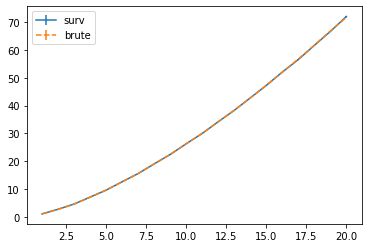

In [3]:
fig, ax = plt.subplots()
Ns = df_surv["N"]
Ns = Ns[Ns <= 20]
s2 = df_surv["s2"]
s2 = s2[Ns.index]
s2_vari = df_surv["s2_variance"]
s2_vari = s2_vari[s2.index]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d, label="surv")

Ns = df_brute["N"]
Ns = Ns[Ns <= 20]
s2 = df_brute["s2"]
s2 = s2[Ns.index]
s2_vari = df_brute["s2_variance"]
s2_vari = s2_vari[s2.index]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d, linestyle="--",label="brute")
ax.legend()

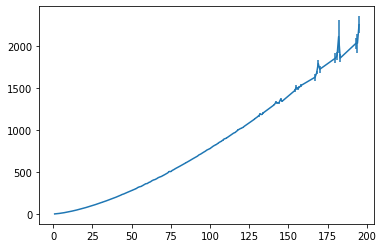

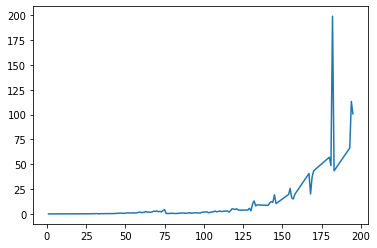

In [4]:
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
Ns = df_surv["N"]
s2 = df_surv["s2"]
s2_vari = df_surv["s2_variance"]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d)

ax1.plot(Ns, s2_d)

In [6]:
df_brute_20 = df_brute[df_brute["N"] <= 20]
df_surv_20 = df_surv[df_surv["N"] <= 20]

print(df_brute_20)
print(df_surv_20)

     N         s2  s2_variance
13   1   1.000000     0.000000
10   2   2.665034     0.000001
12   3   4.550808     0.000006
14   4   7.040680     0.000017
15   5   9.570159     0.000047
19   6  12.570434     0.000089
16   7  15.552718     0.000142
2    8  19.015293     0.000215
5    9  22.426146     0.000460
9   10  26.257410     0.000552
8   11  30.016680     0.000541
6   12  34.171184     0.000838
7   13  38.334969     0.001273
0   14  42.770882     0.000542
1   15  47.254084     0.003645
4   16  52.022453     0.004166
3   17  56.806502     0.004531
17  18  61.763930     0.008529
18  19  66.875121     0.003403
11  20  71.850913     0.022287
      N         s2  s2_variance
114   1   1.000000     0.000000
124   2   2.667002     0.000001
115   3   4.551980     0.000006
146   4   7.042049     0.000006
137   5   9.568786     0.000024
125   6  12.574583     0.000060
136   7  15.536814     0.000053
5     8  19.015754     0.000152
0     9  22.400719     0.000097
15   10  26.261142     0.0002

Text(0, 0.5, '$S_N^2$')

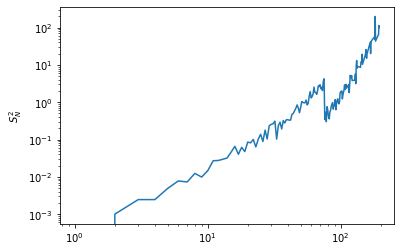

In [7]:
fig, ax = plt.subplots()
Ns = df_surv["N"]
s2 = df_surv["s2"]

ax.plot(Ns, s2_d)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_label("N")
ax.set_ylabel("$S_N^2$")